💾 1.Download Historical Data

Goal: get price data (e.g., AAPL, MSFT, AMZN, GOOGL, SPY) from Yahoo Finance.

In [1]:
from operator import index

import numpy as np
import yfinance as yf
from numpy.ma.core import transpose

tickers = ["AAPL", "MSFT", "AMZN", "GOOGL", "SPY"]
stocks = yf.download(tickers, period="max")

/var/folders/dn/4wqw68cj32z10qplr1wpk7gc0000gn/T/ipykernel_25636/4066106577.py:8: FutureWarning: YF.download() has changed argument auto_adjust default to True
  stocks = yf.download(tickers, period="max")
[*********************100%***********************]  5 of 5 completed


In [2]:
stocks

Price            Close                                                  \
Ticker            AAPL        AMZN       GOOGL        MSFT         SPY   
Date                                                                     
1980-12-12    0.098389         NaN         NaN         NaN         NaN   
1980-12-15    0.093256         NaN         NaN         NaN         NaN   
1980-12-16    0.086412         NaN         NaN         NaN         NaN   
1980-12-17    0.088550         NaN         NaN         NaN         NaN   
1980-12-18    0.091118         NaN         NaN         NaN         NaN   
...                ...         ...         ...         ...         ...   
2025-11-05  269.878387  250.199997  284.309998  507.160004  677.580017   
2025-11-06  269.508728  243.039993  284.750000  497.100006  670.309998   
2025-11-07  268.209991  244.410004  278.829987  496.820007  670.969971   
2025-11-10  269.429993  248.399994  290.100006  506.000000  681.440002   
2025-11-11  274.070099  249.005005  289.404999  505.079987  682.559814   

Price             High                                                  ...  \
Ticker            AAPL        AMZN       GOOGL        MSFT         SPY  ...   
Date                                                                    ...   
1980-12-12    0.098817         NaN         NaN         NaN         NaN  ...   
1980-12-15    0.093684         NaN         NaN         NaN         NaN  ...   
1980-12-16    0.086839         NaN         NaN         NaN         NaN  ...   
1980-12-17    0.088978         NaN         NaN         NaN         NaN  ...   
1980-12-18    0.091545         NaN         NaN         NaN         NaN  ...   
...                ...         ...         ...         ...         ...  ...   
2025-11-05  271.436874  251.000000  286.420013  514.830017  680.859985  ...   
2025-11-06  273.135217  250.380005  288.350006  505.700012  677.380005  ...   
2025-11-07  272.026299  244.899994  283.779999  499.380005  671.080017  ...   
2025-11-10  273.730011  251.750000  290.799988  506.850006  682.179993  ...   
2025-11-11  274.739990  249.629898  291.119995  506.200012  682.590027  ...   

Price             Open                                                  \
Ticker            AAPL        AMZN       GOOGL        MSFT         SPY   
Date                                                                     
1980-12-12    0.098389         NaN         NaN         NaN         NaN   
1980-12-15    0.093684         NaN         NaN         NaN         NaN   
1980-12-16    0.086839         NaN         NaN         NaN         NaN   
1980-12-17    0.088550         NaN         NaN         NaN         NaN   
1980-12-18    0.091118         NaN         NaN         NaN         NaN   
...                ...         ...         ...         ...         ...   
2025-11-05  268.349840  249.029999  278.869995  513.299988  674.979980   
2025-11-06  267.630574  249.160004  285.329987  505.660004  676.469971   
2025-11-07  269.538690  242.899994  283.209991  496.950012  667.909973   
2025-11-10  268.959991  248.339996  284.420013  500.040009  677.239990   
2025-11-11  269.809998  248.445007  287.744995  504.799988  679.950012   

Price          Volume                                                   
Ticker           AAPL        AMZN       GOOGL        MSFT          SPY  
Date                                                                    
1980-12-12  469033600         NaN         NaN         NaN          NaN  
1980-12-15  175884800         NaN         NaN         NaN          NaN  
1980-12-16  105728000         NaN         NaN         NaN          NaN  
1980-12-17   86441600         NaN         NaN         NaN          NaN  
1980-12-18   73449600         NaN         NaN         NaN          NaN  
...               ...         ...         ...         ...          ...  
2025-11-05   43683100  40610700.0  31010300.0  23024300.0   74402400.0  
2025-11-06   51204000  46004200.0  37173600.0  27406500.0   85035300.0  
2025-11-07   482

🧹 2. Data Cleaning and Preparation

Goal: ensure data consistency and handle missing values.

In [3]:
stocks = stocks.drop(columns={"High", "Low", "Open", "Volume"})
stocks

Price            Close                                                
Ticker            AAPL        AMZN       GOOGL        MSFT         SPY
Date                                                                  
1980-12-12    0.098389         NaN         NaN         NaN         NaN
1980-12-15    0.093256         NaN         NaN         NaN         NaN
1980-12-16    0.086412         NaN         NaN         NaN         NaN
1980-12-17    0.088550         NaN         NaN         NaN         NaN
1980-12-18    0.091118         NaN         NaN         NaN         NaN
...                ...         ...         ...         ...         ...
2025-11-05  269.878387  250.199997  284.309998  507.160004  677.580017
2025-11-06  269.508728  243.039993  284.750000  497.100006  670.309998
2025-11-07  268.209991  244.410004  278.829987  496.820007  670.969971
2025-11-10  269.429993  248.399994  290.100006  506.000000  681.440002
2025-11-11  274.070099  249.005005  289.404999  505.079987  682.559814

[11321 rows x 5 columns]

In [4]:
stocks = stocks.dropna()
stocks

Price            Close                                                
Ticker            AAPL        AMZN       GOOGL        MSFT         SPY
Date                                                                  
2004-08-19    0.460512    1.931500    2.493811   16.744194   73.764641
2004-08-20    0.461862    1.975500    2.691894   16.793589   74.282364
2004-08-23    0.466061    1.972500    2.718985   16.867903   74.094078
2004-08-24    0.479107    1.952500    2.606397   16.867903   74.194946
2004-08-25    0.495602    2.015000    2.634483   17.059864   74.699226
...                ...         ...         ...         ...         ...
2025-11-05  269.878387  250.199997  284.309998  507.160004  677.580017
2025-11-06  269.508728  243.039993  284.750000  497.100006  670.309998
2025-11-07  268.209991  244.410004  278.829987  496.820007  670.969971
2025-11-10  269.429993  248.399994  290.100006  506.000000  681.440002
2025-11-11  274.070099  249.005005  289.404999  505.079987  682.559814

[5343 rows x 5 columns]

📈3. Visual Exploration

Goal: visualize price movements over time.

Plot line charts of each stock’s price.

Compare stocks to the SPY index.

Optionally use a logarithmic scale for prices.

<Axes: title={'center': 'Stocks Closing Prices'}, xlabel='Date'>

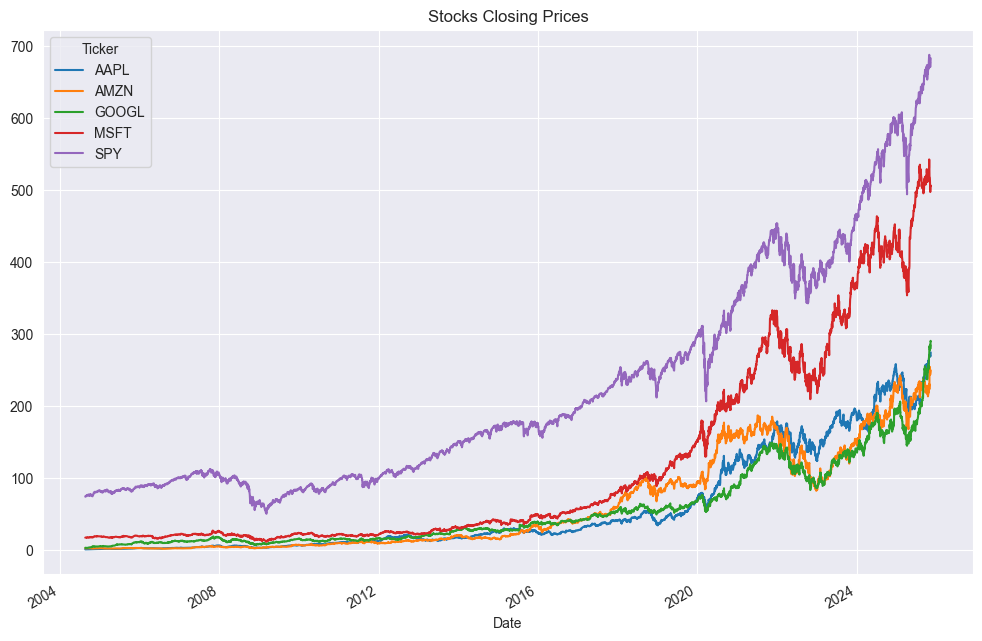

In [5]:
stocks["Close"].plot(title="Stocks Closing Prices", figsize=(12, 8))

<Axes: title={'center': 'SPY Closing Prices'}, xlabel='Date'>

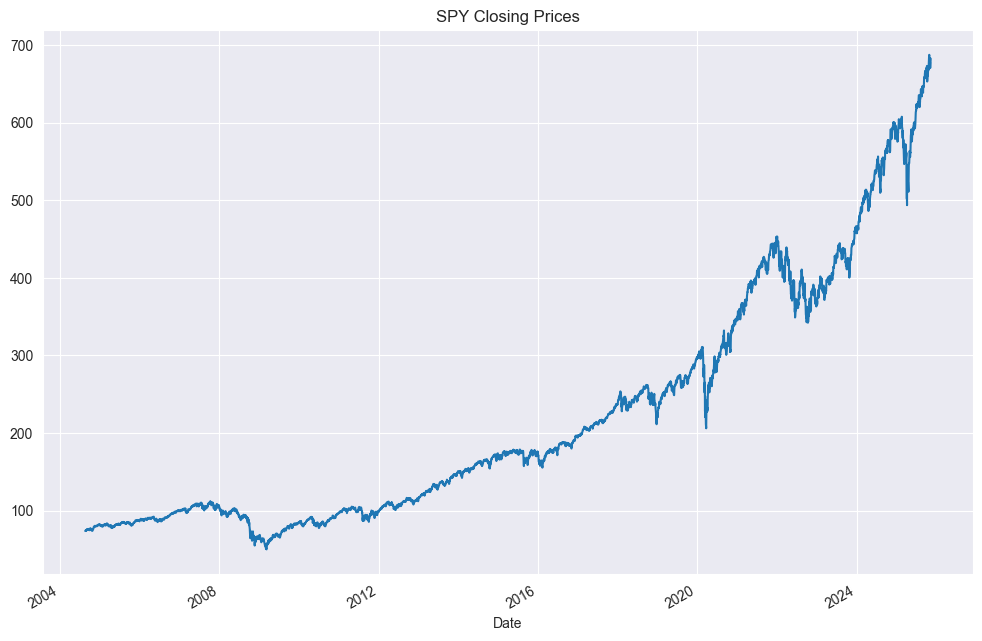

In [6]:
stocks["Close", "SPY"].plot(title="SPY Closing Prices", figsize=(12, 8))

🔢 5. Compute Returns

Goal: transform prices into returns for comparison and add them to the dataframe

In [7]:
import pandas as pd

In [8]:
returns = pd.DataFrame()

In [9]:
returns = pd.concat({
    "Linear Returns" : stocks/stocks.shift(1) - 1,
    "Log Returns" : stocks/stocks.shift(1)
}, axis=1)
returns

Linear Returns                                         Log Returns  \
Price               Close                                               Close   
Ticker               AAPL      AMZN     GOOGL      MSFT       SPY        AAPL   
Date                                                                            
2004-08-19            NaN       NaN       NaN       NaN       NaN         NaN   
2004-08-20       0.002931  0.022780  0.079430  0.002950  0.007019    1.002931   
2004-08-23       0.009090 -0.001519  0.010064  0.004425 -0.002535    1.009090   
2004-08-24       0.027993 -0.010139 -0.041408  0.000000  0.001361    1.027993   
2004-08-25       0.034429  0.032010  0.010776  0.011380  0.006797    1.034429   
...                   ...       ...       ...       ...       ...         ...   
2025-11-05       0.000370  0.003530  0.024393 -0.013940  0.003465    1.000370   
2025-11-06      -0.001370 -0.028617  0.001548 -0.019836 -0.010729    0.998630   
2025-11-07      -0.004819  0.005637 -0.020790 -0.000563  0.000985    0.995181   
2025-11-10       0.004549  0.016325  0.040419  0.018478  0.015604    1.004549   
2025-11-11       0.017222  0.002436 -0.002396 -0.001818  0.001643    1.017222   

                                                    
Price                                               
Ticker          AMZN     GOOGL      MSFT       SPY  
Date                                                
2004-08-19       NaN       NaN       NaN       NaN  
2004-08-20  1.022780  1.079430  1.002950  1.007019  
2004-08-23  0.998481  1.010064  1.004425  0.997465  
2004-08-24  0.989861  0.958592  1.000000  1.001361  
2004-08-25  1.032010  1.010776  1.011380  1.006797  
...              ...       ...       ...       ...  
2025-11-05  1.003530  1.024393  0.986060  1.003465  
2025-11-06  0.971383  1.001548  0.980164  0.989271  
2025-11-07  1.005637  0.979210  0.999437  1.000985  
2025-11-10  1.016325  1.040419  1.018478  1.015604  
2025-11-11  1.002436  0.997604  0.998182  1.001643  

[5343 rows x 10 columns]

In [10]:
returns = returns.droplevel(1, axis=1)

In [11]:
returns = returns.dropna()

In [12]:
returns

Linear Returns                                         Log Returns  \
Ticker               AAPL      AMZN     GOOGL      MSFT       SPY        AAPL   
Date                                                                            
2004-08-20       0.002931  0.022780  0.079430  0.002950  0.007019    1.002931   
2004-08-23       0.009090 -0.001519  0.010064  0.004425 -0.002535    1.009090   
2004-08-24       0.027993 -0.010139 -0.041408  0.000000  0.001361    1.027993   
2004-08-25       0.034429  0.032010  0.010776  0.011380  0.006797    1.034429   
2004-08-26       0.048714 -0.002730  0.018019 -0.003993  0.000000    1.048714   
...                   ...       ...       ...       ...       ...         ...   
2025-11-05       0.000370  0.003530  0.024393 -0.013940  0.003465    1.000370   
2025-11-06      -0.001370 -0.028617  0.001548 -0.019836 -0.010729    0.998630   
2025-11-07      -0.004819  0.005637 -0.020790 -0.000563  0.000985    0.995181   
2025-11-10       0.004549  0.016325  0.040419  0.018478  0.015604    1.004549   
2025-11-11       0.017222  0.002436 -0.002396 -0.001818  0.001643    1.017222   

                                                    
Ticker          AMZN     GOOGL      MSFT       SPY  
Date                                                
2004-08-20  1.022780  1.079430  1.002950  1.007019  
2004-08-23  0.998481  1.010064  1.004425  0.997465  
2004-08-24  0.989861  0.958592  1.000000  1.001361  
2004-08-25  1.032010  1.010776  1.011380  1.006797  
2004-08-26  0.997270  1.018019  0.996007  1.000000  
...              ...       ...       ...       ...  
2025-11-05  1.003530  1.024393  0.986060  1.003465  
2025-11-06  0.971383  1.001548  0.980164  0.989271  
2025-11-07  1.005637  0.979210  0.999437  1.000985  
2025-11-10  1.016325  1.040419  1.018478  1.015604  
2025-11-11  1.002436  0.997604  0.998182  1.001643  

[5342 rows x 10 columns]

<Axes: title={'center': 'Log Returns of Apple'}, xlabel='Date'>

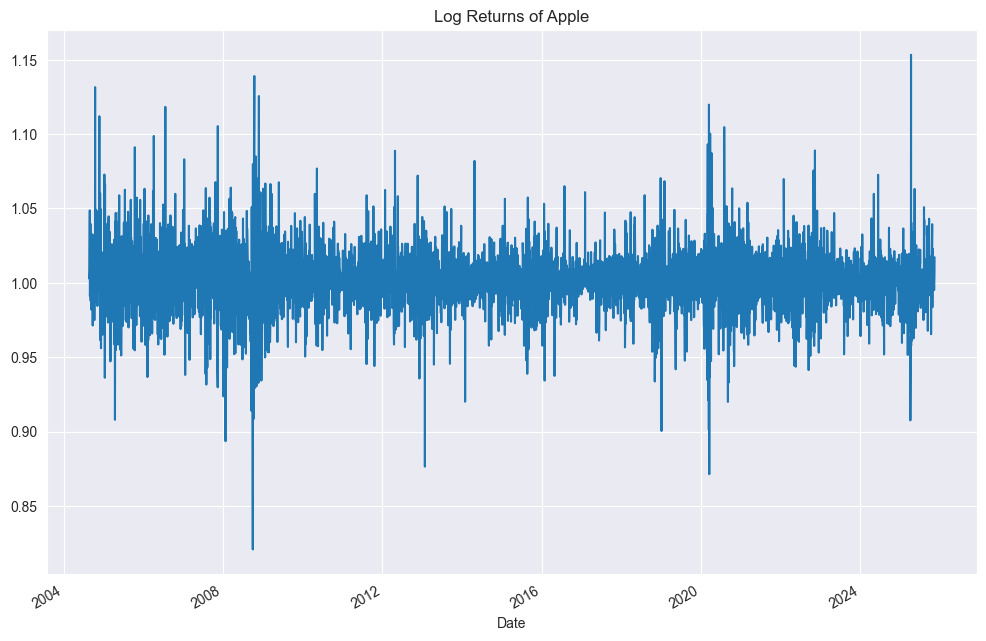

In [13]:
returns["Log Returns", "AAPL"].plot(title="Log Returns of Apple", figsize=(12, 8))

📊 6. Descriptive Statistics

Goal: summarize key properties of returns.

Compute mean, standard deviation, skewness, kurtosis, min, max.

In [14]:
stats = returns.describe()
stats

Linear Returns                                                      \
Ticker           AAPL         AMZN        GOOGL         MSFT          SPY   
count     5342.000000  5342.000000  5342.000000  5342.000000  5342.000000   
mean         0.001405     0.001192     0.001076     0.000781     0.000488   
std          0.020448     0.023850     0.019321     0.016921     0.011949   
min         -0.179195    -0.218220    -0.116341    -0.147390    -0.109424   
25%         -0.008171    -0.009933    -0.008016    -0.007044    -0.003931   
50%          0.001154     0.000671     0.000897     0.000475     0.000731   
75%          0.011666     0.012361     0.010266     0.008821     0.005791   
max          0.153288     0.269497     0.199915     0.186046     0.145198   

        Log Returns                                                      
Ticker         AAPL         AMZN        GOOGL         MSFT          SPY  
count   5342.000000  5342.000000  5342.000000  5342.000000  5342.000000  
mean       1.001405     1.001192     1.001076     1.000781     1.000488  
std        0.020448     0.023850     0.019321     0.016921     0.011949  
min        0.820805     0.781780     0.883659     0.852610     0.890576  
25%        0.991829     0.990067     0.991984     0.992956     0.996069  
50%        1.001154     1.000671     1.000897     1.000475     1.000731  
75%        1.011666     1.012361     1.010266     1.008821     1.005791  
max        1.153288     1.269497     1.199915     1.186046     1.145198

In [15]:
import scipy.stats as sp

In [16]:
kurt = sp.kurtosis(returns)
kurt = pd.Series(kurt)
kurt

0     5.868385
1    14.551178
2     8.878026
3    10.065337
4    15.487699
5     5.868385
6    14.551178
7     8.878026
8    10.065337
9    15.487699
dtype: float64

In [17]:
stats["kurt"] = kurt
stats

Linear Returns                                                      \
Ticker           AAPL         AMZN        GOOGL         MSFT          SPY   
count     5342.000000  5342.000000  5342.000000  5342.000000  5342.000000   
mean         0.001405     0.001192     0.001076     0.000781     0.000488   
std          0.020448     0.023850     0.019321     0.016921     0.011949   
min         -0.179195    -0.218220    -0.116341    -0.147390    -0.109424   
25%         -0.008171    -0.009933    -0.008016    -0.007044    -0.003931   
50%          0.001154     0.000671     0.000897     0.000475     0.000731   
75%          0.011666     0.012361     0.010266     0.008821     0.005791   
max          0.153288     0.269497     0.199915     0.186046     0.145198   

        Log Returns                                                     kurt  
Ticker         AAPL         AMZN        GOOGL         MSFT          SPY       
count   5342.000000  5342.000000  5342.000000  5342.000000  5342.000000  NaN  
mean       1.001405     1.001192     1.001076     1.000781     1.000488  NaN  
std        0.020448     0.023850     0.019321     0.016921     0.011949  NaN  
min        0.820805     0.781780     0.883659     0.852610     0.890576  NaN  
25%        0.991829     0.990067     0.991984     0.992956     0.996069  NaN  
50%        1.001154     1.000671     1.000897     1.000475     1.000731  NaN  
75%        1.011666     1.012361     1.010266     1.008821     1.005791  NaN  
max        1.153288     1.269497     1.199915     1.186046     1.145198  NaN

In [18]:
kurt = sp.kurtosis(returns)
kurt = pd.DataFrame(kurt, index = returns.columns, columns = ["Excess Kurtosis"])
kurt

Excess Kurtosis
               Ticker                 
Linear Returns AAPL           5.868385
               AMZN          14.551178
               GOOGL          8.878026
               MSFT          10.065337
               SPY           15.487699
Log Returns    AAPL           5.868385
               AMZN          14.551178
               GOOGL          8.878026
               MSFT          10.065337
               SPY           15.487699

In [19]:
kurt.loc[("Linear Returns","AAPL"), "Excess Kurtosis"]

np.float64(5.868384554759665)

In [20]:
skew = sp.skew(returns)
skew = pd.DataFrame(skew, index = returns.columns, columns = ["Skew"])
skew

Skew
               Ticker          
Linear Returns AAPL    0.106682
               AMZN    0.837087
               GOOGL   0.600272
               MSFT    0.275736
               SPY    -0.002685
Log Returns    AAPL    0.106682
               AMZN    0.837087
               GOOGL   0.600272
               MSFT    0.275736
               SPY    -0.002685

🔄 7. Rolling Statistics

Goal: explore how metrics evolve over time.

Rolling mean and volatility.
Plot rolling volatility for each asset.

In [21]:
n = len(returns)

rolling_mean = returns.rolling(window=20).mean() #monthly rolling estimate
rolling_mean

Linear Returns                                         Log Returns  \
Ticker               AAPL      AMZN     GOOGL      MSFT       SPY        AAPL   
Date                                                                            
2004-08-20            NaN       NaN       NaN       NaN       NaN         NaN   
2004-08-23            NaN       NaN       NaN       NaN       NaN         NaN   
2004-08-24            NaN       NaN       NaN       NaN       NaN         NaN   
2004-08-25            NaN       NaN       NaN       NaN       NaN         NaN   
2004-08-26            NaN       NaN       NaN       NaN       NaN         NaN   
...                   ...       ...       ...       ...       ...         ...   
2025-11-05       0.002403  0.005682  0.007705 -0.001649  0.000375    1.002403   
2025-11-06       0.003113  0.003691  0.008414 -0.002407 -0.000017    1.003113   
2025-11-07       0.004598  0.006470  0.008401 -0.001340  0.001384    1.004598   
2025-11-10       0.004338  0.006431  0.008820 -0.000719  0.001397    1.004338   
2025-11-11       0.005177  0.007389  0.008434 -0.000763  0.001540    1.005177   

                                                    
Ticker          AMZN     GOOGL      MSFT       SPY  
Date                                                
2004-08-20       NaN       NaN       NaN       NaN  
2004-08-23       NaN       NaN       NaN       NaN  
2004-08-24       NaN       NaN       NaN       NaN  
2004-08-25       NaN       NaN       NaN       NaN  
2004-08-26       NaN       NaN       NaN       NaN  
...              ...       ...       ...       ...  
2025-11-05  1.005682  1.007705  0.998351  1.000375  
2025-11-06  1.003691  1.008414  0.997593  0.999983  
2025-11-07  1.006470  1.008401  0.998660  1.001384  
2025-11-10  1.006431  1.008820  0.999281  1.001397  
2025-11-11  1.007389  1.008434  0.999237  1.001540  

[5342 rows x 10 columns]

<Axes: title={'center': 'Linear Rolling Mean of Apple'}, xlabel='Date'>

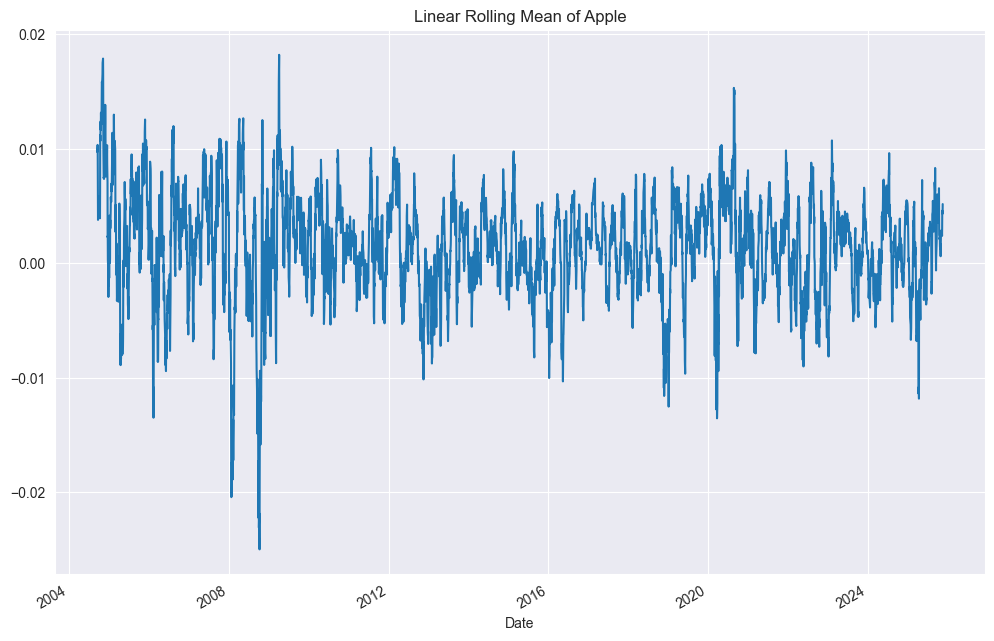

In [22]:
rolling_mean["Linear Returns", "AAPL"].plot(title="Linear Rolling Mean of Apple", figsize=(12, 8))

In [23]:
rolling_std = returns.rolling(window = 20).std()
rolling_std

Linear Returns                                         Log Returns  \
Ticker               AAPL      AMZN     GOOGL      MSFT       SPY        AAPL   
Date                                                                            
2004-08-20            NaN       NaN       NaN       NaN       NaN         NaN   
2004-08-23            NaN       NaN       NaN       NaN       NaN         NaN   
2004-08-24            NaN       NaN       NaN       NaN       NaN         NaN   
2004-08-25            NaN       NaN       NaN       NaN       NaN         NaN   
2004-08-26            NaN       NaN       NaN       NaN       NaN         NaN   
...                   ...       ...       ...       ...       ...         ...   
2025-11-05       0.015419  0.029692  0.018301  0.011573  0.009577    0.015419   
2025-11-06       0.014865  0.030623  0.017738  0.012258  0.009874    0.014865   
2025-11-07       0.012141  0.027902  0.017760  0.011369  0.007555    0.012141   
2025-11-10       0.012080  0.027887  0.018433  0.012109  0.007580    0.012080   
2025-11-11       0.012375  0.027374  0.018590  0.012112  0.007555    0.012375   

                                                    
Ticker          AMZN     GOOGL      MSFT       SPY  
Date                                                
2004-08-20       NaN       NaN       NaN       NaN  
2004-08-23       NaN       NaN       NaN       NaN  
2004-08-24       NaN       NaN       NaN       NaN  
2004-08-25       NaN       NaN       NaN       NaN  
2004-08-26       NaN       NaN       NaN       NaN  
...              ...       ...       ...       ...  
2025-11-05  0.029692  0.018301  0.011573  0.009577  
2025-11-06  0.030623  0.017738  0.012258  0.009874  
2025-11-07  0.027902  0.017760  0.011369  0.007555  
2025-11-10  0.027887  0.018433  0.012109  0.007580  
2025-11-11  0.027374  0.018590  0.012112  0.007555  

[5342 rows x 10 columns]

<Axes: title={'center': 'Log Rolling Volatility of MSFT'}, xlabel='Date'>

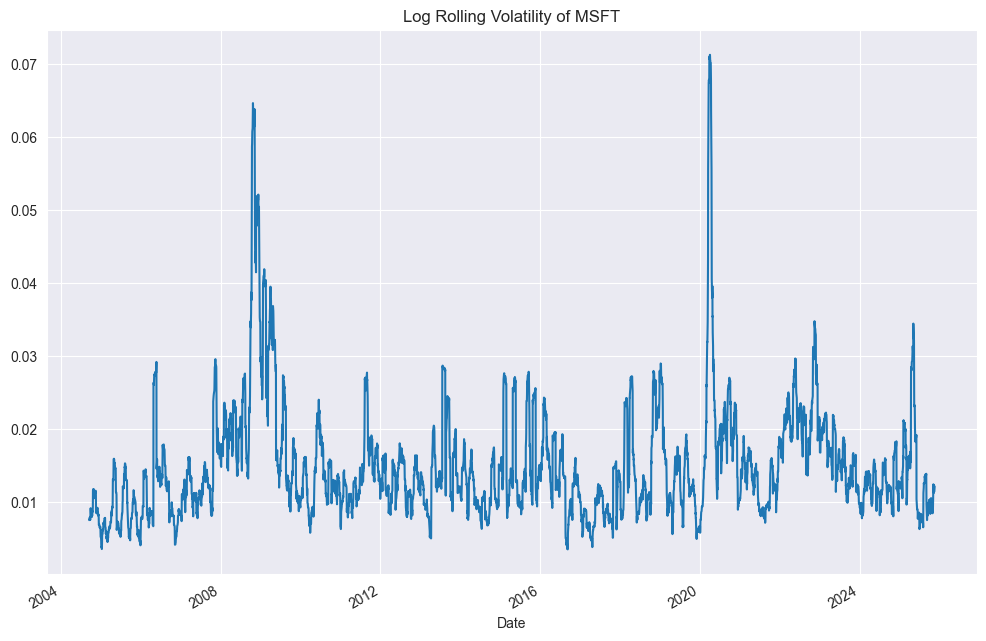

In [24]:
rolling_std["Log Returns", "MSFT"].plot(title="Log Rolling Volatility of MSFT", figsize=(12, 8))

🔁 8. Correlation Analysis

Goal: understand how stocks move together.

Compute the correlation matrix of returns.

Visualize it with a heatmap

In [25]:
varcov_log = returns["Log Returns"].corr()
varcov_log

Ticker,AAPL,AMZN,GOOGL,MSFT,SPY
Ticker,,,,,
AAPL,1.000000,0.454813,0.513511,0.521513,0.630495
AMZN,0.454813,1.000000,0.514021,0.527626,0.575006
GOOGL,0.513511,0.514021,1.000000,0.558397,0.628171
MSFT,0.521513,0.527626,0.558397,1.000000,0.733120
SPY,0.630495,0.575006,0.628171,0.733120,1.000000


In [26]:
import seaborn as sns

<Axes: xlabel='Ticker', ylabel='Ticker'>

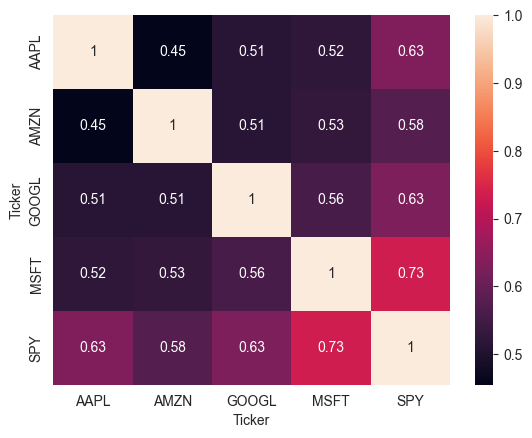

In [27]:
sns.heatmap(varcov_log, annot=True)

📉 9. Aggregate Performance

Goal: show cumulative growth and drawdowns.

Compute cumulative returns: \( (1 + r_t).cumprod() - 1 \)

Compute drawdowns: distance from historical peak.

Plot cumulative returns and drawdown charts.

In [41]:
lin_returns = returns["Linear Returns"]
cum_lin_returns =  (1+lin_returns).cumprod()
cum_lin_returns.iloc[0]=0

In [42]:
cum_lin_returns

Ticker,AAPL,AMZN,GOOGL,MSFT,SPY
Date,,,,,
2004-08-20,0.000000,0.000000,0.000000,0.000000,0.000000
2004-08-23,1.012048,1.021227,1.090293,1.007388,1.004466
2004-08-24,1.040378,1.010872,1.045146,1.007388,1.005833
2004-08-25,1.076197,1.043231,1.056408,1.018853,1.012670
2004-08-26,1.128624,1.040383,1.075443,1.014784,1.012670
...,...,...,...,...,...
2025-11-05,586.039236,129.536631,114.006249,30.288708,9.185702
2025-11-06,585.236523,125.829665,114.182686,29.687903,9.087145
2025-11-07,582.416325,126.538964,111.808804,29.671181,9.096092


<Axes: title={'center': 'Cumulative Linear Returns'}, xlabel='Date'>

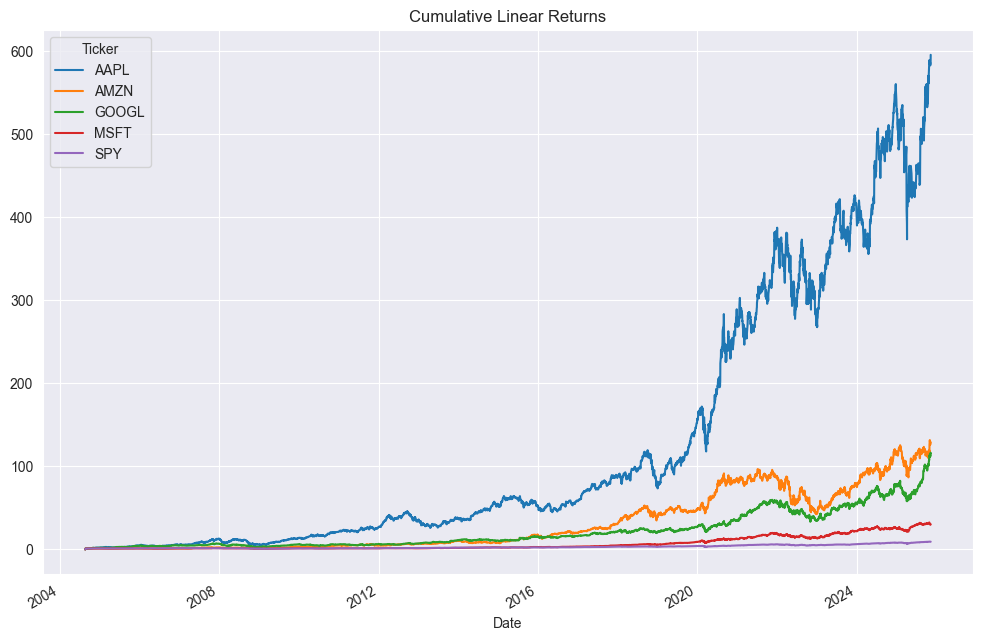

In [43]:
cum_lin_returns.plot(title="Cumulative Linear Returns", figsize=(12, 8))

In [46]:
rolling_max = cum_lin_returns.rolling(window = 250).max()
drawdown = cum_lin_returns/rolling_max -1
drawdown

Ticker,AAPL,AMZN,GOOGL,MSFT,SPY
Date,,,,,
2004-08-20,NaN,NaN,NaN,NaN,NaN
2004-08-23,NaN,NaN,NaN,NaN,NaN
2004-08-24,NaN,NaN,NaN,NaN,NaN
2004-08-25,NaN,NaN,NaN,NaN,NaN
2004-08-26,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...
2025-11-05,-0.004643,-0.014961,0.000000,-0.064401,-0.014271
2025-11-06,-0.006006,-0.043150,0.000000,-0.082960,-0.024848
2025-11-07,-0.010796,-0.037756,-0.020790,-0.083476,-0.023888


<Axes: title={'center': "Stocks's Drawdowns"}, xlabel='Date'>

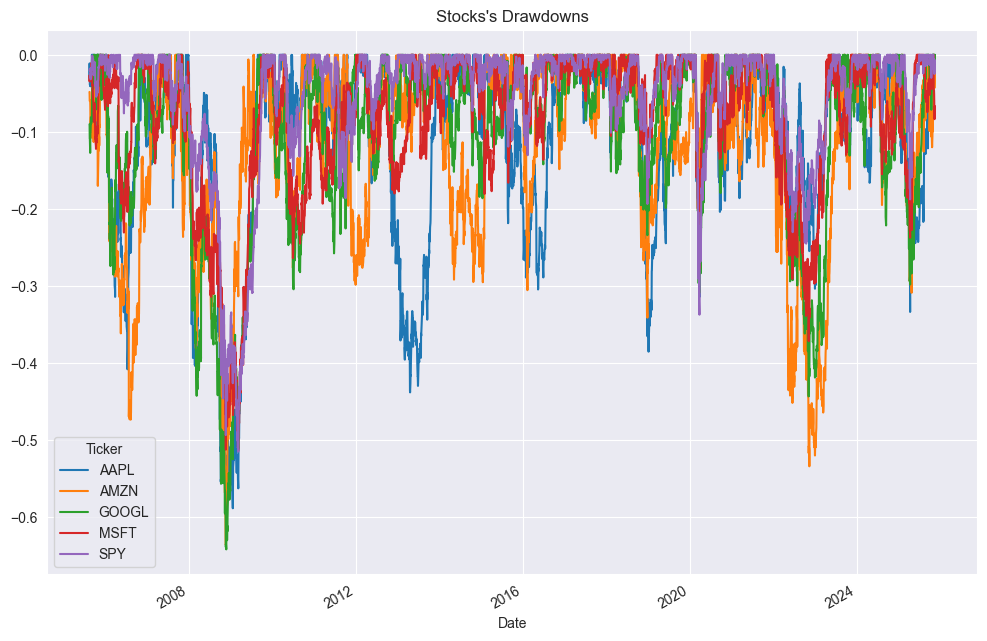

In [47]:
drawdown.plot(title="Stocks's Drawdowns", figsize=(12, 8))

🧠 10. Conclusions

Goal: interpret the results.

Which stocks are more volatile?

Which are most correlated with the index?

In [33]:
print("The most volatile stock is ", stats.idxmax(axis=1).loc["std"], "with a volatilty of", stats.loc["std"].max())
print("The stock which is most correlated with the index is ", varcov_log.drop(columns = {"SPY"}).idxmax(axis=1).loc["SPY"], "with a correlation of", varcov_log.drop(columns = {"SPY"}).loc["SPY"].max())
print("The stock which had the highest drowdown was ", drawdown.min().idxmin())

The most volatile stock is  ('Linear Returns', 'AMZN') with a volatilty of 0.023849726760932277
The stock which is most correlated with the index is  MSFT with a correlation of 0.7331203803325761
The stock which had the highest drowdown was  MSFT


In [34]:
varcov_log.drop(columns = {"SPY"}).loc["SPY"].max()

np.float64(0.7331203803325761)

In [35]:
stats.loc["std"].max()

np.float64(0.023849726760932277)